## Import Libraries

In [ ]:
# !pip install fastai==2.7.12

In [ ]:
import numpy as np
import pandas as pd
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai.vision.data import ImageDataLoaders
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
print(os.listdir("/content"))
import torchvision.models as models

['.config', 'archive.zip', 'sample_data']


## Data Preparation

In [ ]:
from zipfile import ZipFile
file_name = '/content/archive.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
DATA_DIR='/content/brain_tumor_dataset'

In [ ]:
os.listdir(f'{DATA_DIR}')

['no', 'yes']

In [ ]:
from fastai.vision.all import *

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.25, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=[*aug_transforms(flip_vert=True, max_rotate=25.0, max_zoom=1.2, max_lighting=0.4), Normalize.from_stats(*imagenet_stats)]
)

dls = data.dataloaders(DATA_DIR, bs=24, num_workers=0)

print(f'Classes: \n {dls.vocab}')


Classes: 
 ['no', 'yes']


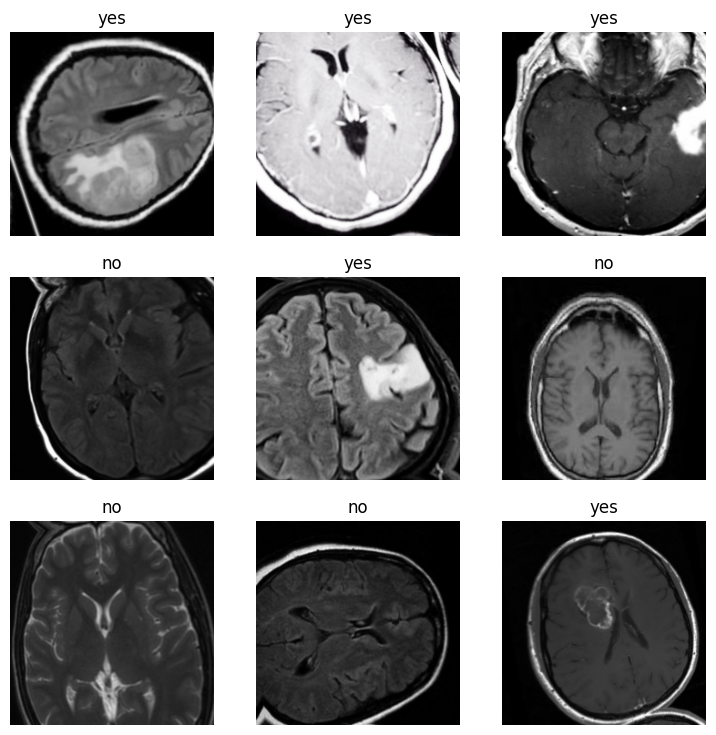

In [ ]:
dls.show_batch()

## Model Training

In [ ]:
from fastai.vision.all import *

learner = vision_learner(dls, models.vgg16, metrics=[accuracy], model_dir="/tmp/model/")

SuggestedLRs(valley=0.0014454397605732083)

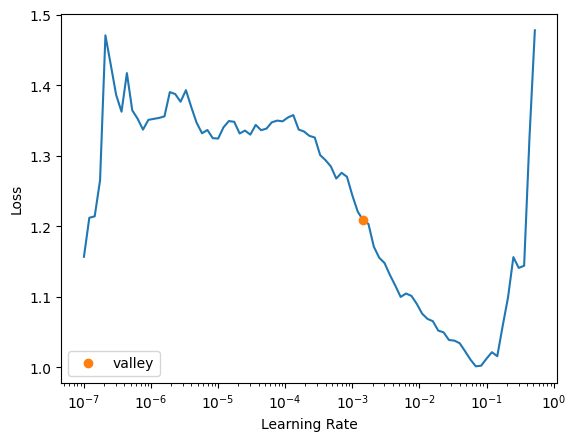

In [ ]:
# Find the Best Learning Rate
learner.lr_find()

In [ ]:
# Training First Round
learner.fit_one_cycle(15, lr_max=slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.242970,0.661685,0.761905,01:45
1,1.175229,0.657632,0.809524,01:48
2,1.040824,0.734191,0.761905,01:46
3,0.919420,0.828715,0.809524,01:49
4,0.853992,0.827071,0.825397,01:45
5,0.781464,0.995926,0.746032,01:44
6,0.693781,0.843579,0.777778,01:45
7,0.616891,0.895244,0.793651,01:44
8,0.577453,0.884588,0.809524,01:51
9,0.577462,0.758715,0.809524,01:47


In [ ]:
# Save Model Stage 1
learner.save('/content/stage-1')

Path('/content/stage-1.pth')

In [ ]:
learner.unfreeze()

SuggestedLRs(valley=7.585775892948732e-05)

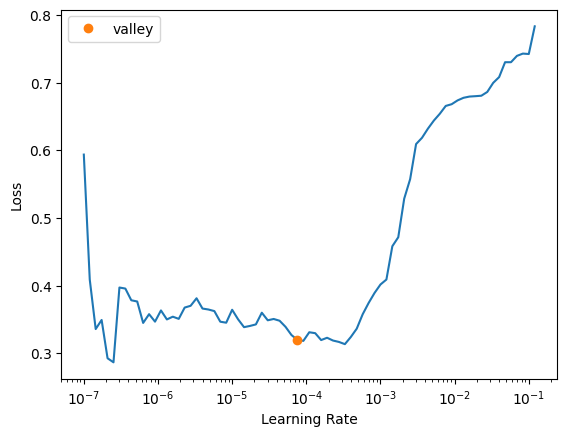

In [ ]:
# Find the Best Learning Rate and Plot Learning Curve
learner.lr_find()

In [ ]:
# Load First Stage Model
learner.load('/content/stage-1')

In [ ]:
# Training Second Round
learner.fit_one_cycle(10, lr_max=slice(1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.366381,0.716405,0.841270,04:19
1,0.335473,0.712025,0.841270,04:17
2,0.349620,0.696505,0.793651,04:17
3,0.371041,0.697852,0.841270,04:17
4,0.355157,0.680999,0.825397,04:20
5,0.335000,0.684511,0.841270,04:25
6,0.342341,0.676458,0.825397,04:18
7,0.347636,0.679298,0.841270,04:18
8,0.326240,0.682804,0.841270,04:16
9,0.320167,0.687903,0.841270,04:19


In [ ]:
# Save Model Stage 2
learner.save('/content/stage-2')

Path('/content/stage-2.pth')

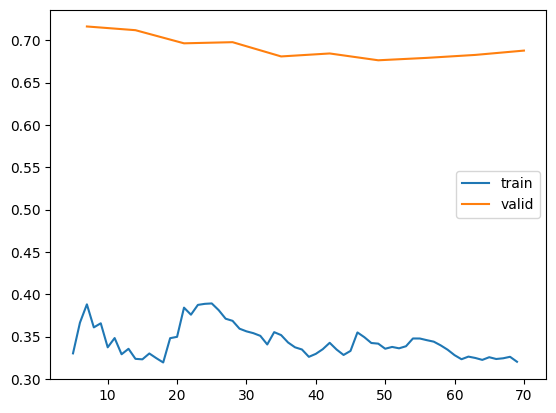

In [ ]:
# Plot Learning Curve
learner.recorder.plot_loss()

## Model Testing

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

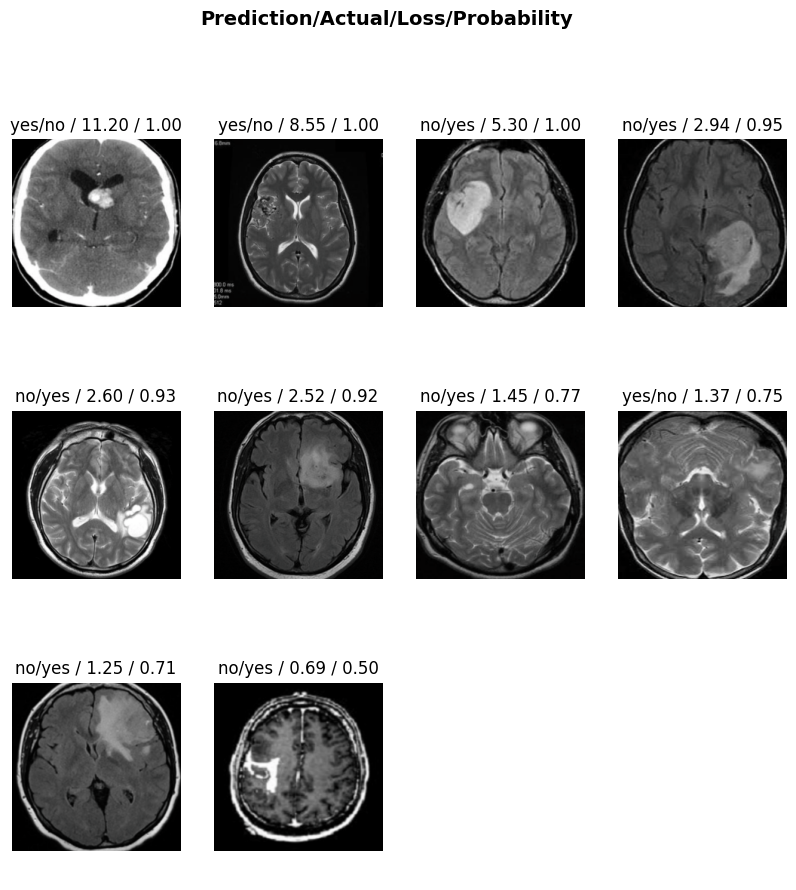

In [ ]:
interp.plot_top_losses(10, figsize=(10,10))

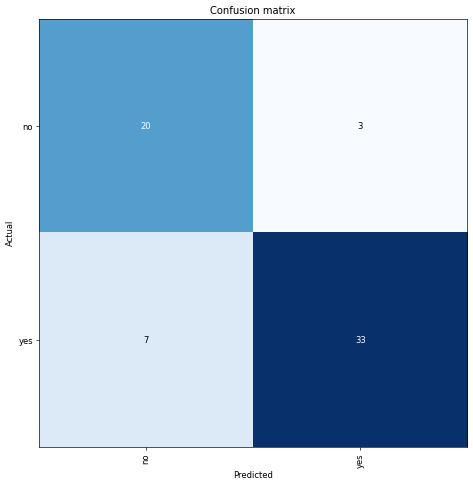

In [ ]:
# Confusion Matrix
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)